[View in Colaboratory](https://colab.research.google.com/github/diego-carvalho/tweet-classifier/blob/master/Tweet_classifier_Data_Exploration.ipynb)

Para baixar os dados e executar:

Copie esse arquivo para seu google Drive:  https://drive.google.com/open?id=1cEAp9cCI7Z-FZL00gIzDcz1Lq2Agxotp

troque o `file_id` na linha 17 pelo id que aparece no link compartilhável do Google Drive.

para executar uma célula, use `shift-enter` (executa e vai para a próxima célula) ou `ctrl-enter`(só executa a célula)

Define uma função para baixar o arquivo de dados, separa em treino e teste

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from nltk.tokenize import RegexpTokenizer
import re

def clean_tweet(x):
  tokenizer = RegexpTokenizer(r'\w+')
  return re.sub(r'\d+', '', " ".join(tokenizer.tokenize(x)).lower())
  


def load_dataset(seed=42, test_size=0.2, binary=False):
  """Baixa o dataset e separa em treino e teste
  Params:
    seed: Seed para separação aleatória
    test_size: Percentual dos dados para teste
    binary: Se a avaliação vai ser binária (discurso de ódio ou não) 
            ou de três classes: Discurso de ódio, linguagem ofensivo ou nada
  
  Return:
    train(test)_tweets: Tweets para treino/test do algoritmo (pd.series de strings)
    train(test)_labels: categorização dos tweets (array de integers)
    
  """
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  file_id = "1nHhy8X2MN85qvBUR4PlJZS8j9j-gwp61"
  downloaded  = drive.CreateFile({'id':file_id})
  downloaded.GetContentFile('labeled_data.p')
  
  data_set = pd.read_pickle("labeled_data.p")
  if binary:
    data_set["class"].apply(lambda x: 0 if x==2 else 1)
  train, test = train_test_split(data_set, test_size=test_size, shuffle=True)
  train_tweets = train.tweet.apply(clean_tweet)
  train_labels = train["class"]
  
  test_tweets = test.tweet.apply(clean_tweet)
  test_labels = train["class"]
  
  return ((train_tweets, np.array(train_labels)), 
          (test_tweets, np.array(test_labels)))
(train, train_labels), (test, test_labels) = load_dataset(binary=True)

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!'))

pd.options.display.max_colwidth=200
dataset = pd.read_pickle("labeled_data.p")
dataset["clean_tweet"] = dataset.tweet.apply(lambda x:re.sub(r'\d+', '', " ".join(tokenizer.tokenize(x)).lower()))
# dataset[["clean_tweet", "hate_speech"]].head(20)
dataset.head(10)

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']


,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,rt mayasolovely as a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew boy dats cold tyga dwn bad for cuffin dat hoe in the st place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,rt urkindofbrand dawg rt sbabylife you ever fuck a bitch and she start to cry you be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,rt c_g_anderson viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",t_madison_x the shit just blows me claim you so faithful and down for somebody but still fucking with hoes
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",__brighterdays i can not just sit up and hate on another bitch i got too much shit going on
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,selfiequeenbri cause i m tired of you big bitches coming for us skinny girls
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",rhythmixx_ hobbies include fighting mariam bitch


(19826,)
3
14.697518410168465


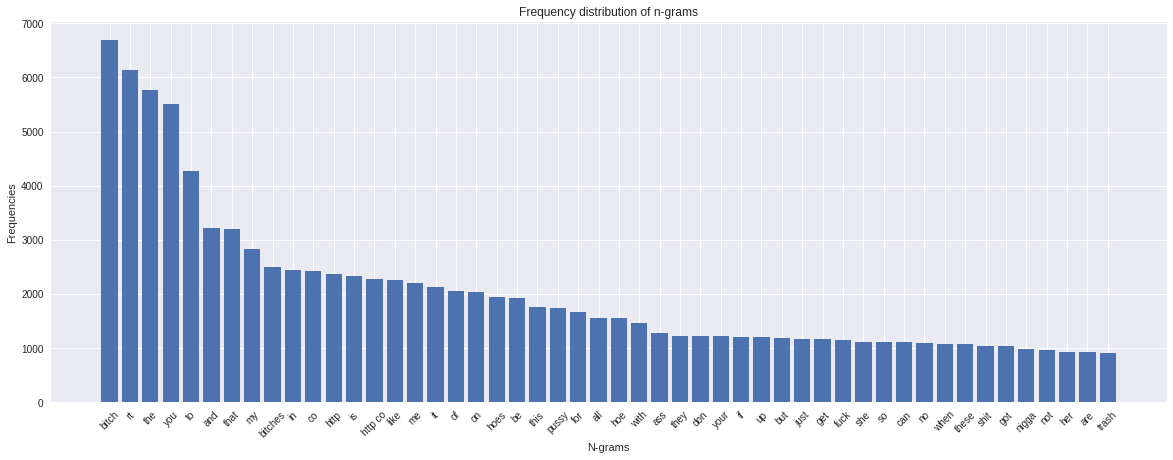

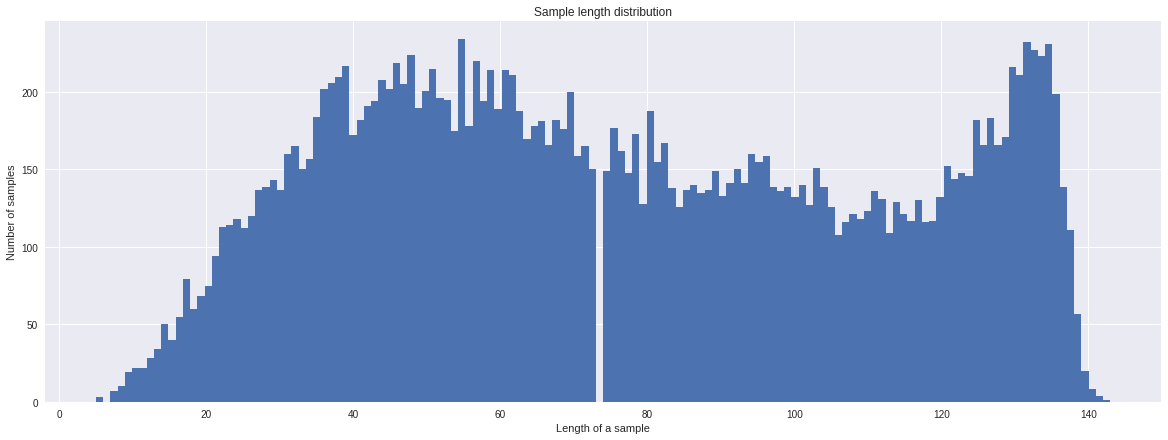

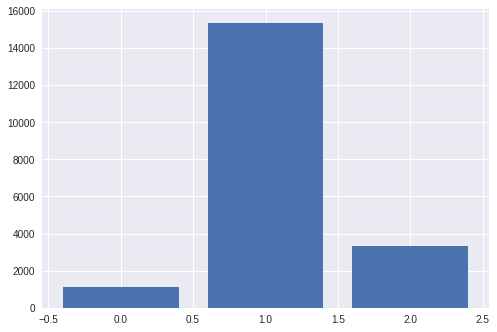

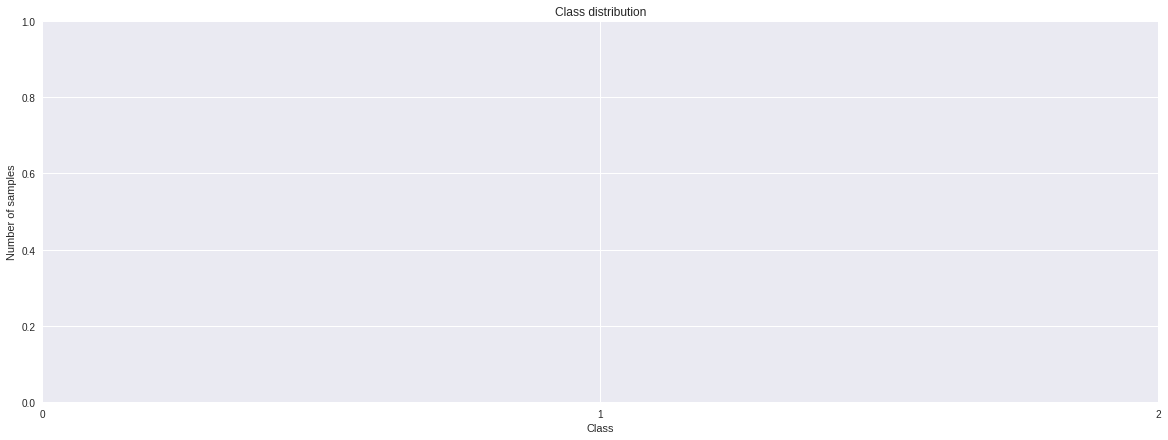

In [7]:
#Key metrics

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


number_of_samples = train.shape
number_of_classes = len(np.unique(train_labels))
num_of_words = np.mean([len(s.split()) for s in train])

print(number_of_samples)
print(number_of_classes)
print(num_of_words)

figsize=(20,7)

def plot_frequency_of_ngrams(sample_texts, ngram_range=(1,2), num_ngrams=50):
  kwargs = {
      'ngram_range': ngram_range,
      'dtype': 'int32',
      'strip_accents': 'unicode',
      'decode_error': 'replace',
      'analyzer': 'word'
  }
  vectorizer = CountVectorizer(**kwargs)
  vectorized_texts = vectorizer.fit_transform(sample_texts)

  all_ngrams = list(vectorizer.get_feature_names())
  num_ngrams = min(num_ngrams, len(all_ngrams))
  all_counts = vectorized_texts.sum(axis=0).tolist()[0]

  all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
      zip(all_counts, all_ngrams), reverse=True)])
  ngrams = list(all_ngrams)[:num_ngrams]
  counts = list(all_counts)[:num_ngrams]

  idx = np.arange(num_ngrams)
  plt.figure(figsize=figsize)
  plt.bar(idx, counts, width=0.8)
  plt.xlabel("N-grams")
  plt.ylabel("Frequencies")
  plt.title("Frequency distribution of n-grams")
  plt.xticks(idx, ngrams, rotation=45)
  plt.show()
  
def plot_sample_len_distribution(sample_texts):
  plt.figure(figsize=figsize)
  plt.hist([len(s) for s in sample_texts if len(s) <= 200], 140)
  plt.xlabel('Length of a sample')
  plt.ylabel('Number of samples')
  plt.title('Sample length distribution')
  plt.show()

def plot_class_distribution(labels):
  num_classes = len(set(labels))
  count_map = Counter(labels)
  counts = [count_map[i] for i in range(num_classes)]
  idx = np.arange(num_classes)
  plt.bar(idx, counts, width=0.8)
  plt.figure(figsize=figsize)
  plt.xlabel('Class')
  plt.ylabel('Number of samples')
  plt.title('Class distribution')
  plt.xticks(idx, idx)
  plt.show()
  
  
plot_frequency_of_ngrams(train)
plot_sample_len_distribution(train)
plot_class_distribution(train_labels)